In [43]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder,PolynomialFeatures
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

In [44]:
file_path='MLSDataBuiltAfter1995/11122000115150.csv'
df=pd.read_csv(file_path)

In [45]:
# Convert 'CloseDate' to datetime format
df['CloseDate'] = pd.to_datetime(df['CloseDate'])

# Extract the year from 'CloseDate'
df['Year'] = df['CloseDate'].dt.year

df.fillna(0, inplace=True)
df = df[(df['YearBuilt'] >= 1998) & (df['YearBuilt'] <= 2024) & (df['YearBuilt'] != 9999)]

In [46]:
# Step 4: Create features and target variable
# df = pd.get_dummies(df, columns=['ElementarySchoolName', 'HighSchoolName', 'PostalCode'])


features = ['CumulativeDaysOnMarket', 'LivingArea','LotSizeArea','LotSizeSquareFeet','RATIO_ClosePrice_By_LivingArea','YearBuilt']


target = 'ClosePrice'

# Extract relevant columns from the DataFrame
selected_columns = features + [target]
selected_data = df[selected_columns]

In [47]:
# Convert categorical features using OneHotEncoder
from sklearn.model_selection import train_test_split

X = selected_data[features]
y = selected_data[target]

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Split the data into training and testing sets with a 70-30 ratio
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)
   


Mean Squared Error with Polynomial Features: 491847.67677694594
R-squared with Polynomial Features: 0.9955268714876925


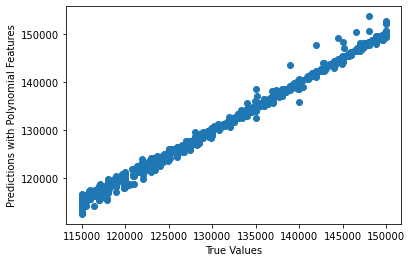

In [48]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred_poly = model.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
print(f'Mean Squared Error with Polynomial Features: {mse_poly}')
r_squared_poly = model.score(X_test_poly, y_test)
print(f'R-squared with Polynomial Features: {r_squared_poly}')

plt.scatter(y_test, y_pred_poly)
plt.xlabel('True Values')
plt.ylabel('Predictions with Polynomial Features')
plt.show()

